# This is an Analysis of mental health from a survey given by Kaggle on people in tech

Data was taken from https://www.kaggle.com/osmi/mental-health-in-tech-survey/version/3

In [154]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [192]:
health_data = os.listdir("data/health")
env_data =  os.listdir("data/env")
health, env = [], []
ozone, pm = {}, {}
for csv in health_data:
    health.append(pd.read_csv("data/health/" + csv, names=["Year","Age (%>65)", "Male", "Female"], skiprows=1))
for csv in env_data:
    env.append(pd.read_csv("data/env/" + csv, names=["Year", "Average (pbb)", "Peak (ppb)"], skiprows=1))

ozone['Health'] = health[0]
pm['Health'] = health[1]
ozone['Concentration'] = env[0].dropna()
pm['Concentration'] = env[1].dropna()

In [193]:
def build_plot(data, name, field, column1, column2):
    data.index = data['Year']
    plt.rcParams['figure.figsize'] = [12, 6]
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(data.index, data[column1], label=column1)
    ax.plot(data.index, data[column2], label=column2)                        

    fig.autofmt_xdate()
    ax.set_title(name)
    ax.set_xlabel('Year')
    ax.set_ylabel(field)
    plt.legend(loc='best')    
    plt.show()

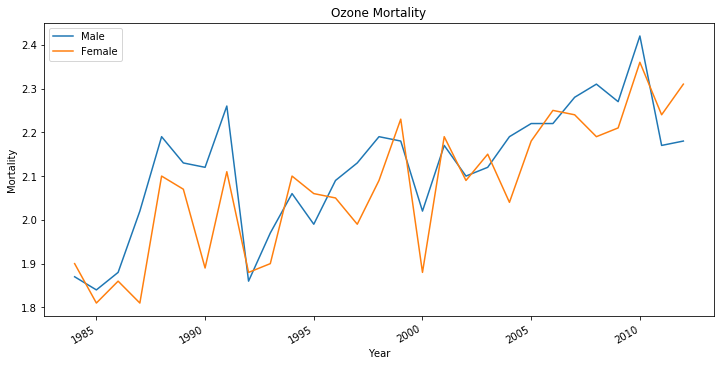

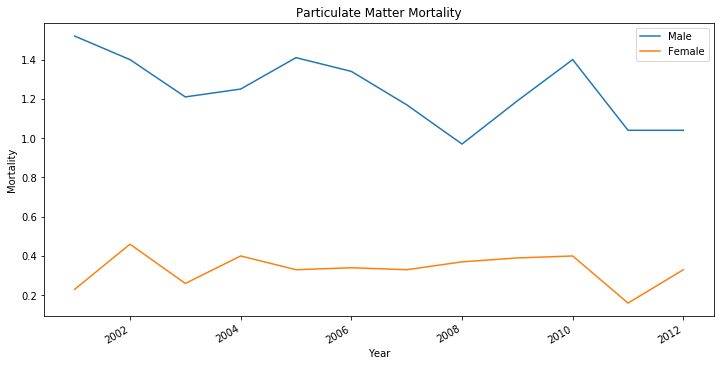

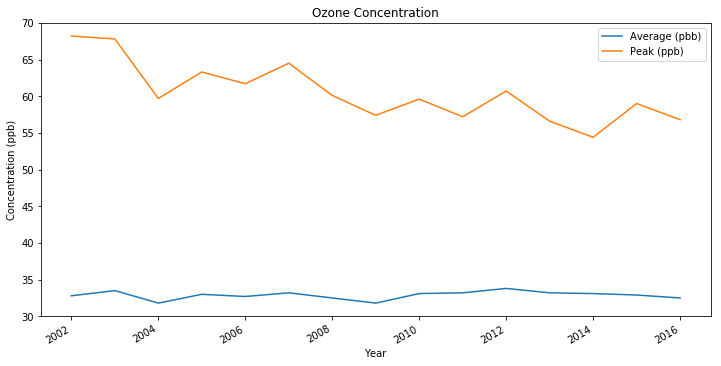

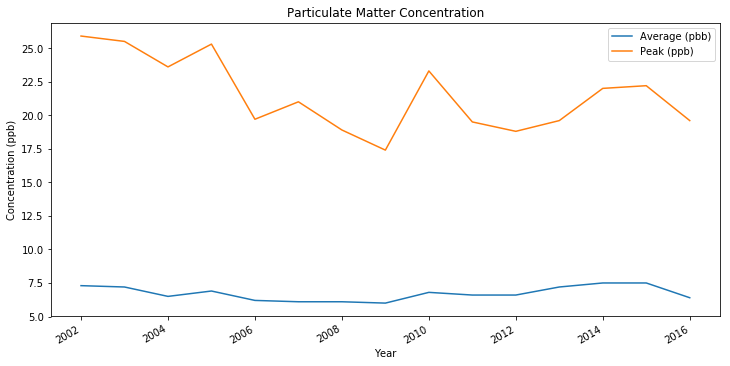

In [194]:
build_plot(ozone["Health"], "Ozone Mortality", "Mortality", "Male","Female")
build_plot(pm["Health"], "Particulate Matter Mortality", "Mortality", "Male","Female")

build_plot(ozone["Concentration"], "Ozone Concentration", "Concentration (ppb)","Average (pbb)", "Peak (ppb)")
build_plot(pm["Concentration"], "Particulate Matter Concentration", "Concentration (ppb)","Average (pbb)", "Peak (ppb)")

In [198]:
def get_predictions(data, column):
    x = np.arange(len(data["Year"]))
    y = data[column]
    model = LinearRegression(fit_intercept=True)
    model.fit(x[:, np.newaxis], y)
    xfit = np.arange(len(data["Year"]))
    yfit = model.predict(xfit[:, np.newaxis])
    return data["Year"], yfit

def build_regression_plot(data, name, field, column1, column2):
    plt.rcParams['figure.figsize'] = [12, 6]
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    xfit, yfit = get_predictions(data, column1)
    ax.scatter(data["Year"], data[column1])
    ax.plot(xfit, yfit)
    
    xfit, yfit = get_predictions(data, column2)
    ax.scatter(data["Year"], data[column2])
    ax.plot(xfit, yfit) 

    fig.autofmt_xdate()
    ax.set_title(name)
    ax.set_xlabel('Year')
    ax.set_ylabel(field)
    plt.legend(loc='best')    
    plt.show()
    
def build_single_regression_plot(data, name, field, column):
    plt.rcParams['figure.figsize'] = [12, 6]
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    xfit, yfit = get_predictions(data, column)
    ax.scatter(data["Year"], data[column])
    ax.plot(xfit, yfit)
    
    fig.autofmt_xdate()
    ax.set_title(name)
    ax.set_xlabel('Year')
    ax.set_ylabel(field)
    plt.legend(loc='best')    
    plt.show()

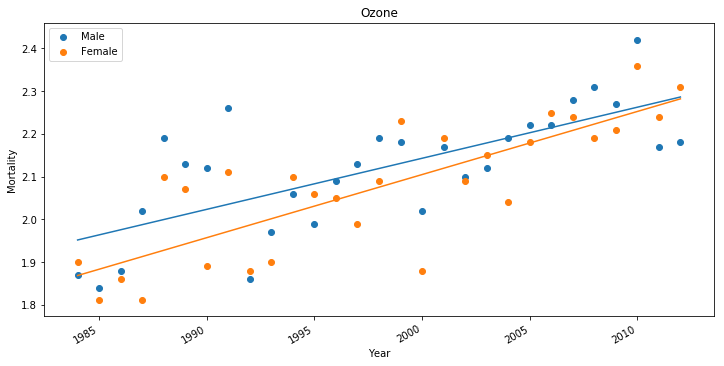

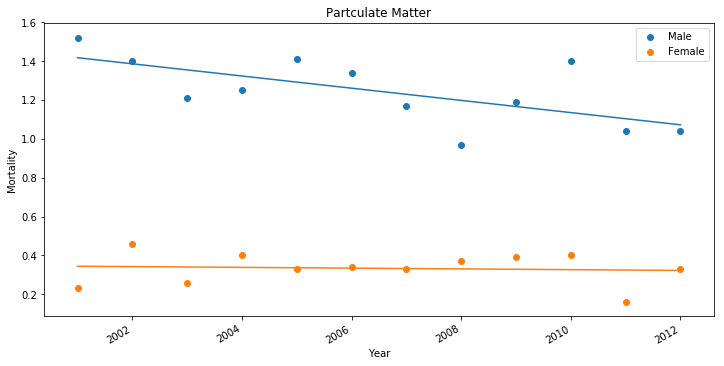

In [196]:
build_regression_plot(ozone["Health"], "Ozone", "Mortality", "Male", "Female")
build_regression_plot(pm["Health"], "Partculate Matter", "Mortality", "Male", "Female")

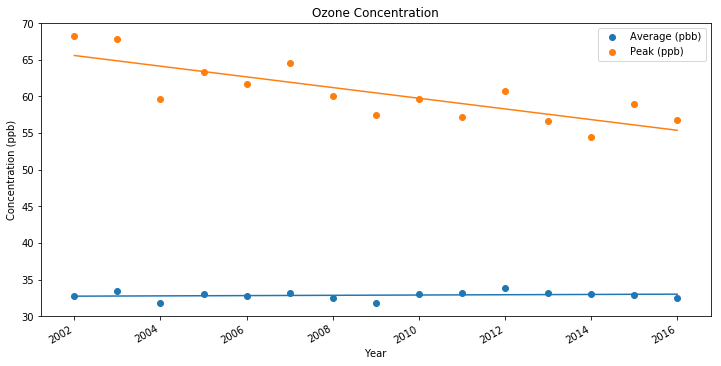

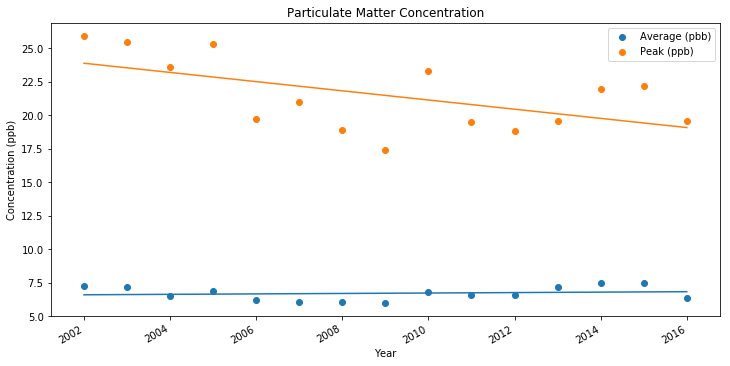

In [197]:
build_regression_plot(ozone["Concentration"], "Ozone Concentration", "Concentration (ppb)","Average (pbb)", "Peak (ppb)")
build_regression_plot(pm["Concentration"], "Particulate Matter Concentration", "Concentration (ppb)","Average (pbb)", "Peak (ppb)")

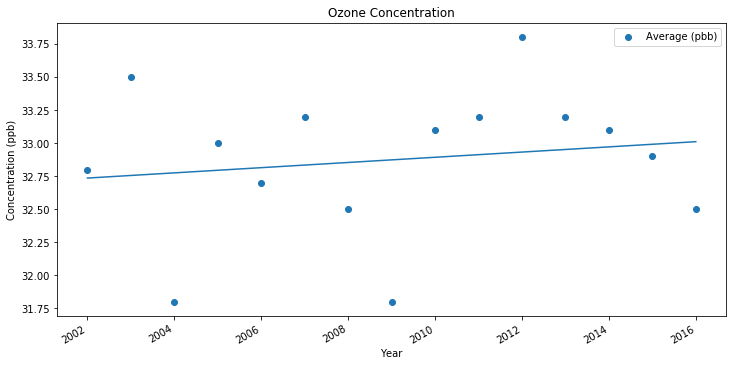

In [200]:
build_single_regression_plot(ozone["Concentration"], "Ozone Concentration", "Concentration (ppb)","Average (pbb)")